In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape((60000,28,28)).astype('float32')/255
x_test = x_test.reshape((10000,28,28)).astype('float32')/255

In [4]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [5]:
inputs = Input(shape =(28,28))
rnn = LSTM(128)(inputs)
r1 = Dense(128)(rnn)
outputs = Dense(10,activation = 'softmax')(r1)
model = tf.keras.Model(inputs = inputs,outputs = outputs)

In [6]:
model.compile(optimizer= 'adam',loss ='categorical_crossentropy',metrics = ['accuracy'])

In [7]:
history = model.fit(x_train,y_train1,validation_split=.1,epochs = 5)

Epoch 1/5
1688/1688 [==============================] - 91s 51ms/step - loss: 0.3220 - accuracy: 0.8945 - val_loss: 0.0919 - val_accuracy: 0.9728
Epoch 2/5
1688/1688 [==============================] - 67s 40ms/step - loss: 0.1064 - accuracy: 0.9673 - val_loss: 0.0844 - val_accuracy: 0.9737
Epoch 3/5
1688/1688 [==============================] - 65s 38ms/step - loss: 0.0776 - accuracy: 0.9765 - val_loss: 0.0569 - val_accuracy: 0.9828
Epoch 4/5
1688/1688 [==============================] - 66s 39ms/step - loss: 0.0579 - accuracy: 0.9827 - val_loss: 0.0560 - val_accuracy: 0.9843
Epoch 5/5
1688/1688 [==============================] - 66s 39ms/step - loss: 0.0472 - accuracy: 0.9861 - val_loss: 0.0555 - val_accuracy: 0.9845


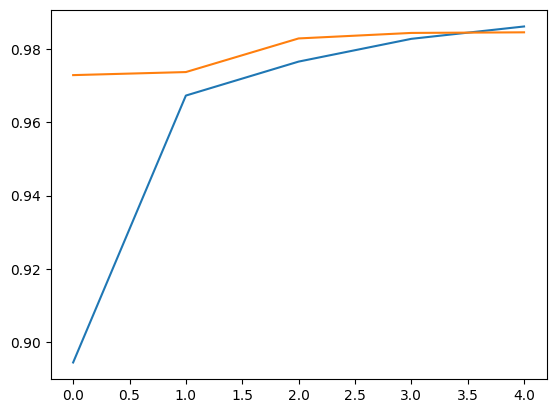

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

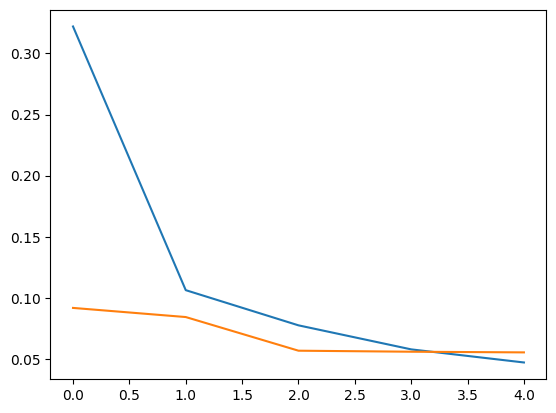

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [10]:
y_pred = model.predict(x_test)

313/313 [==============================] - 4s 13ms/step


In [11]:
y_pred = np.argmax(y_pred,axis = 1)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.984